#### 1. Importando las librerías necesarias

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Cargamos el dataset

In [2]:
import os

MAIN_PATH = os.getcwd()
DATA_PATH = os.path.join(MAIN_PATH, '..', 'data', 'raw', 'data_nvidia.csv')

df_nvidia = pd.read_csv(DATA_PATH, header=1).copy()
df_nvidia.head()

,Date,Open,Range,Volume,Log_Volume,Return_Percentage,3_Day_Avg_AdjClose(Delay),PriorDay_AdjClose,Adj Close
0,2023-01-06,144.74,9.76,40504400.0,7.61,4.164%,144.3591717,142.58,148.52
1,2023-01-09,152.84,9.15,50423100.0,7.70,5.175%,146.171621,148.52,156.20
2,2023-01-10,155.07,4.90,38410100.0,7.58,1.798%,149.1001843,156.20,159.01
3,2023-01-11,158.40,4.65,35328500.0,7.55,0.578%,154.5774943,159.01,159.93
4,2023-01-12,161.00,11.45,55140900.0,7.74,3.187%,158.3822887,159.93,165.03


#### 3. Limpieza de datos

##### 3.1 Mirada informativa del dataset

In [3]:
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       339 non-null    object 
 1   Open                       339 non-null    float64
 2   Range                      339 non-null    float64
 3   Volume                     339 non-null    float64
 4   Log_Volume                 339 non-null    float64
 5   Return_Percentage          339 non-null    object 
 6   3_Day_Avg_AdjClose(Delay)  353 non-null    object 
 7   PriorDay_AdjClose          339 non-null    float64
 8   Adj Close                  339 non-null    float64
dtypes: float64(6), object(3)
memory usage: 24.9+ KB


Lo primero que podemos notar es que el dataset cuenta con 353 registros y 9 columnas, como también ver que a la mayoría de columnas les faltan exactamente la misma cantidad de registros a excepción de la columna 3_Day_Avg_AdjClose(Delay).

También, podemos notar que hay columnas de tipo objeto. Sin embargo, esto no debería ser posible dado que se esperan que todas las columnas sean de algún tipo de dato numérico a menos que existan valores faltantes o que tengan algún valor de tipo String o None.

##### 3.2 Convertir los datos de tipo objeto a sus tipos de datos numéricos

In [4]:
df_nvidia["Date"] = pd.to_datetime(df_nvidia["Date"], errors='coerce')
df_nvidia["Return_Percentage"] = pd.to_numeric(df_nvidia["Return_Percentage"].str.replace('%', ''), errors='coerce')
df_nvidia["3_Day_Avg_AdjClose(Delay)"] = pd.to_numeric(df_nvidia["3_Day_Avg_AdjClose(Delay)"], errors='coerce')

In [5]:
df_nvidia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       339 non-null    datetime64[ns]
 1   Open                       339 non-null    float64       
 2   Range                      339 non-null    float64       
 3   Volume                     339 non-null    float64       
 4   Log_Volume                 339 non-null    float64       
 5   Return_Percentage          339 non-null    float64       
 6   3_Day_Avg_AdjClose(Delay)  339 non-null    float64       
 7   PriorDay_AdjClose          339 non-null    float64       
 8   Adj Close                  339 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 24.9 KB


Después de hacer el cambio de tipo de datos vemos que ahora todas las columnas les hacen falta exactamente la misma cantidad de registros o filas. Esto puede darnos una pista de que estamos tratando con valores nulos o faltantes.

##### 3.3 Datos faltantes

In [6]:
df_nvidia.isna().sum()

Date                         14
Open                         14
Range                        14
Volume                       14
Log_Volume                   14
Return_Percentage            14
3_Day_Avg_AdjClose(Delay)    14
PriorDay_AdjClose            14
Adj Close                    14
dtype: int64

Aquí podemos ver lo que ya se había dicho anteriormente sobre la cantidad de registros con valores faltantes. Además, si exploramos un poco más los datos veremos que los registros faltantes son las últimas 14 filas.

In [7]:
df_nvidia.tail(14)

,Date,Open,Range,Volume,Log_Volume,Return_Percentage,3_Day_Avg_AdjClose(Delay),PriorDay_AdjClose,Adj Close
339,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Por ello, lo que vamos a hacer es eliminarlos del dataset debido a que son registros que no aportan ningún valor a nuestro objetivo.

In [8]:
df_nvidia.dropna(inplace=True)

##### 3.4 Columnas irrelevantes

Lo que buscamos ahora es saber que columnas son irrelevantes considerando si las columnas numéricas no son de un solo valor por medio de la desviación estándar y en caso de que lo fueran eliminarlas, ya que podemos considerarla como una columna constante y puede no general valor.

In [9]:
df_nvidia.select_dtypes(include='float').describe()

,Open,Range,Volume,Log_Volume,Return_Percentage,3_Day_Avg_AdjClose(Delay),PriorDay_AdjClose,Adj Close
count,339.000000,339.000000,3.390000e+02,339.000000,339.000000,339.000000,339.000000,339.000000
mean,477.510324,17.052920,4.826127e+07,7.664926,0.592608,473.521201,475.730826,477.976873
std,214.092658,13.096537,1.577824e+07,0.124012,3.108756,212.058589,212.799544,213.290497
min,144.740000,3.970000,1.982090e+07,7.300000,-10.005000,144.359172,142.580000,148.520000
25%,286.045000,8.810000,3.837440e+07,7.580000,-1.275500,285.235179,286.200000,287.735000
50%,447.380000,12.690000,4.477920e+07,7.650000,0.431000,448.242899,446.820000,447.760000
75%,541.180000,20.965000,5.391805e+07,7.730000,2.216000,523.697113,537.425000,545.270000
max,958.510000,108.940000,1.543911e+08,8.190000,24.370000,939.506673,950.020000,950.020000


En base a los resultados podemos ver que las desviaciones estándar de las columnas numéricas son diferentes a 0.

##### 3.5 Registros repetidos

In [10]:
print('Cantidad de registros antes de eliminar filas repetidas', df_nvidia.shape)
df_nvidia.drop_duplicates(inplace=True)
print('Cantidad de registros después de eliminar filas repetidas', df_nvidia.shape)

Cantidad de registros antes de eliminar filas repetidas (339, 9)
Cantidad de registros después de eliminar filas repetidas (339, 9)


##### 3.6 Outliers en las variables numéricas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.

In [11]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IRQ = Q3 - Q1
    lower_bound = Q1 - 1.5 * IRQ
    upper_bound = Q3 + 1.5 * IRQ
    out_sup = data[data[column] > upper_bound].index
    out_inf = data[data[column] < lower_bound].index
    outliers = []
    for i in out_sup:
        outliers.append(i)
        for j in out_inf:
            outliers.append(j)
    size = len(outliers)
    return size, outliers

In [12]:
numeric_columns = df_nvidia.select_dtypes(include='float').columns.tolist()

outliers_dict = {}
for col in numeric_columns:
    size, outliers = detect_outliers(df_nvidia, col)
    out_percentage = round(size*100/df_nvidia.shape[0], 2)
    outliers_dict[col] = [size, out_percentage]

outliers_dict

{'Open': [4, 1.18],
 'Range': [22, 6.49],
 'Volume': [17, 5.01],
 'Log_Volume': [16, 4.72],
 'Return_Percentage': [10, 2.95],
 '3_Day_Avg_AdjClose(Delay)': [25, 7.37],
 'PriorDay_AdjClose': [7, 2.06],
 'Adj Close': [2, 0.59]}

Aquí podemos tener una comprensión general de cuáles columnas tienen más valores atípicos y que porcentaje de outliers tienen cada una.

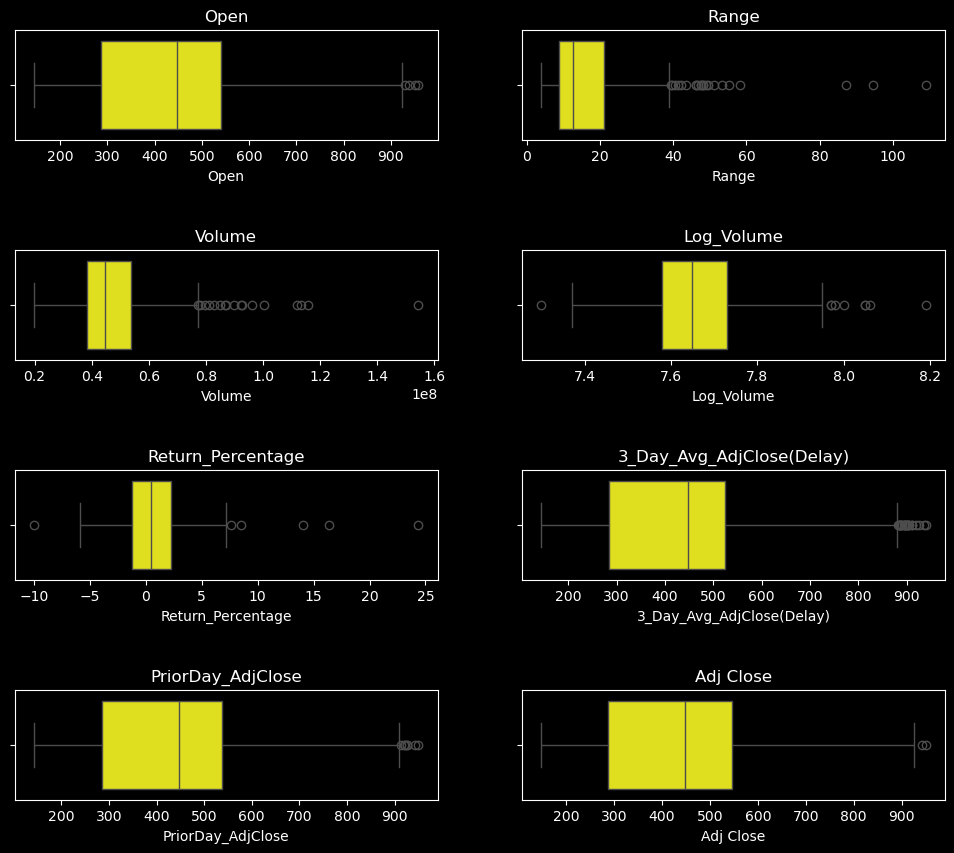

In [13]:
# Generamos gráficamos de boxplot para las variables numéricas
plt.style.use('dark_background')

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=col, data=df_nvidia, ax=ax[i//2, i%2], color='yellow')
    ax[i//2, i%2].set_title(col)

plt.show()

##### 3.7 Guardamos el nuevo dataset limpio

In [14]:
DATA_PROCESSED = os.path.join(MAIN_PATH, '..', 'data', 'processed', 'data_clean_nvidia.csv')
df_nvidia.to_csv(DATA_PROCESSED, index=False)

#### 4. Análisis de correlación de las variables numéricas

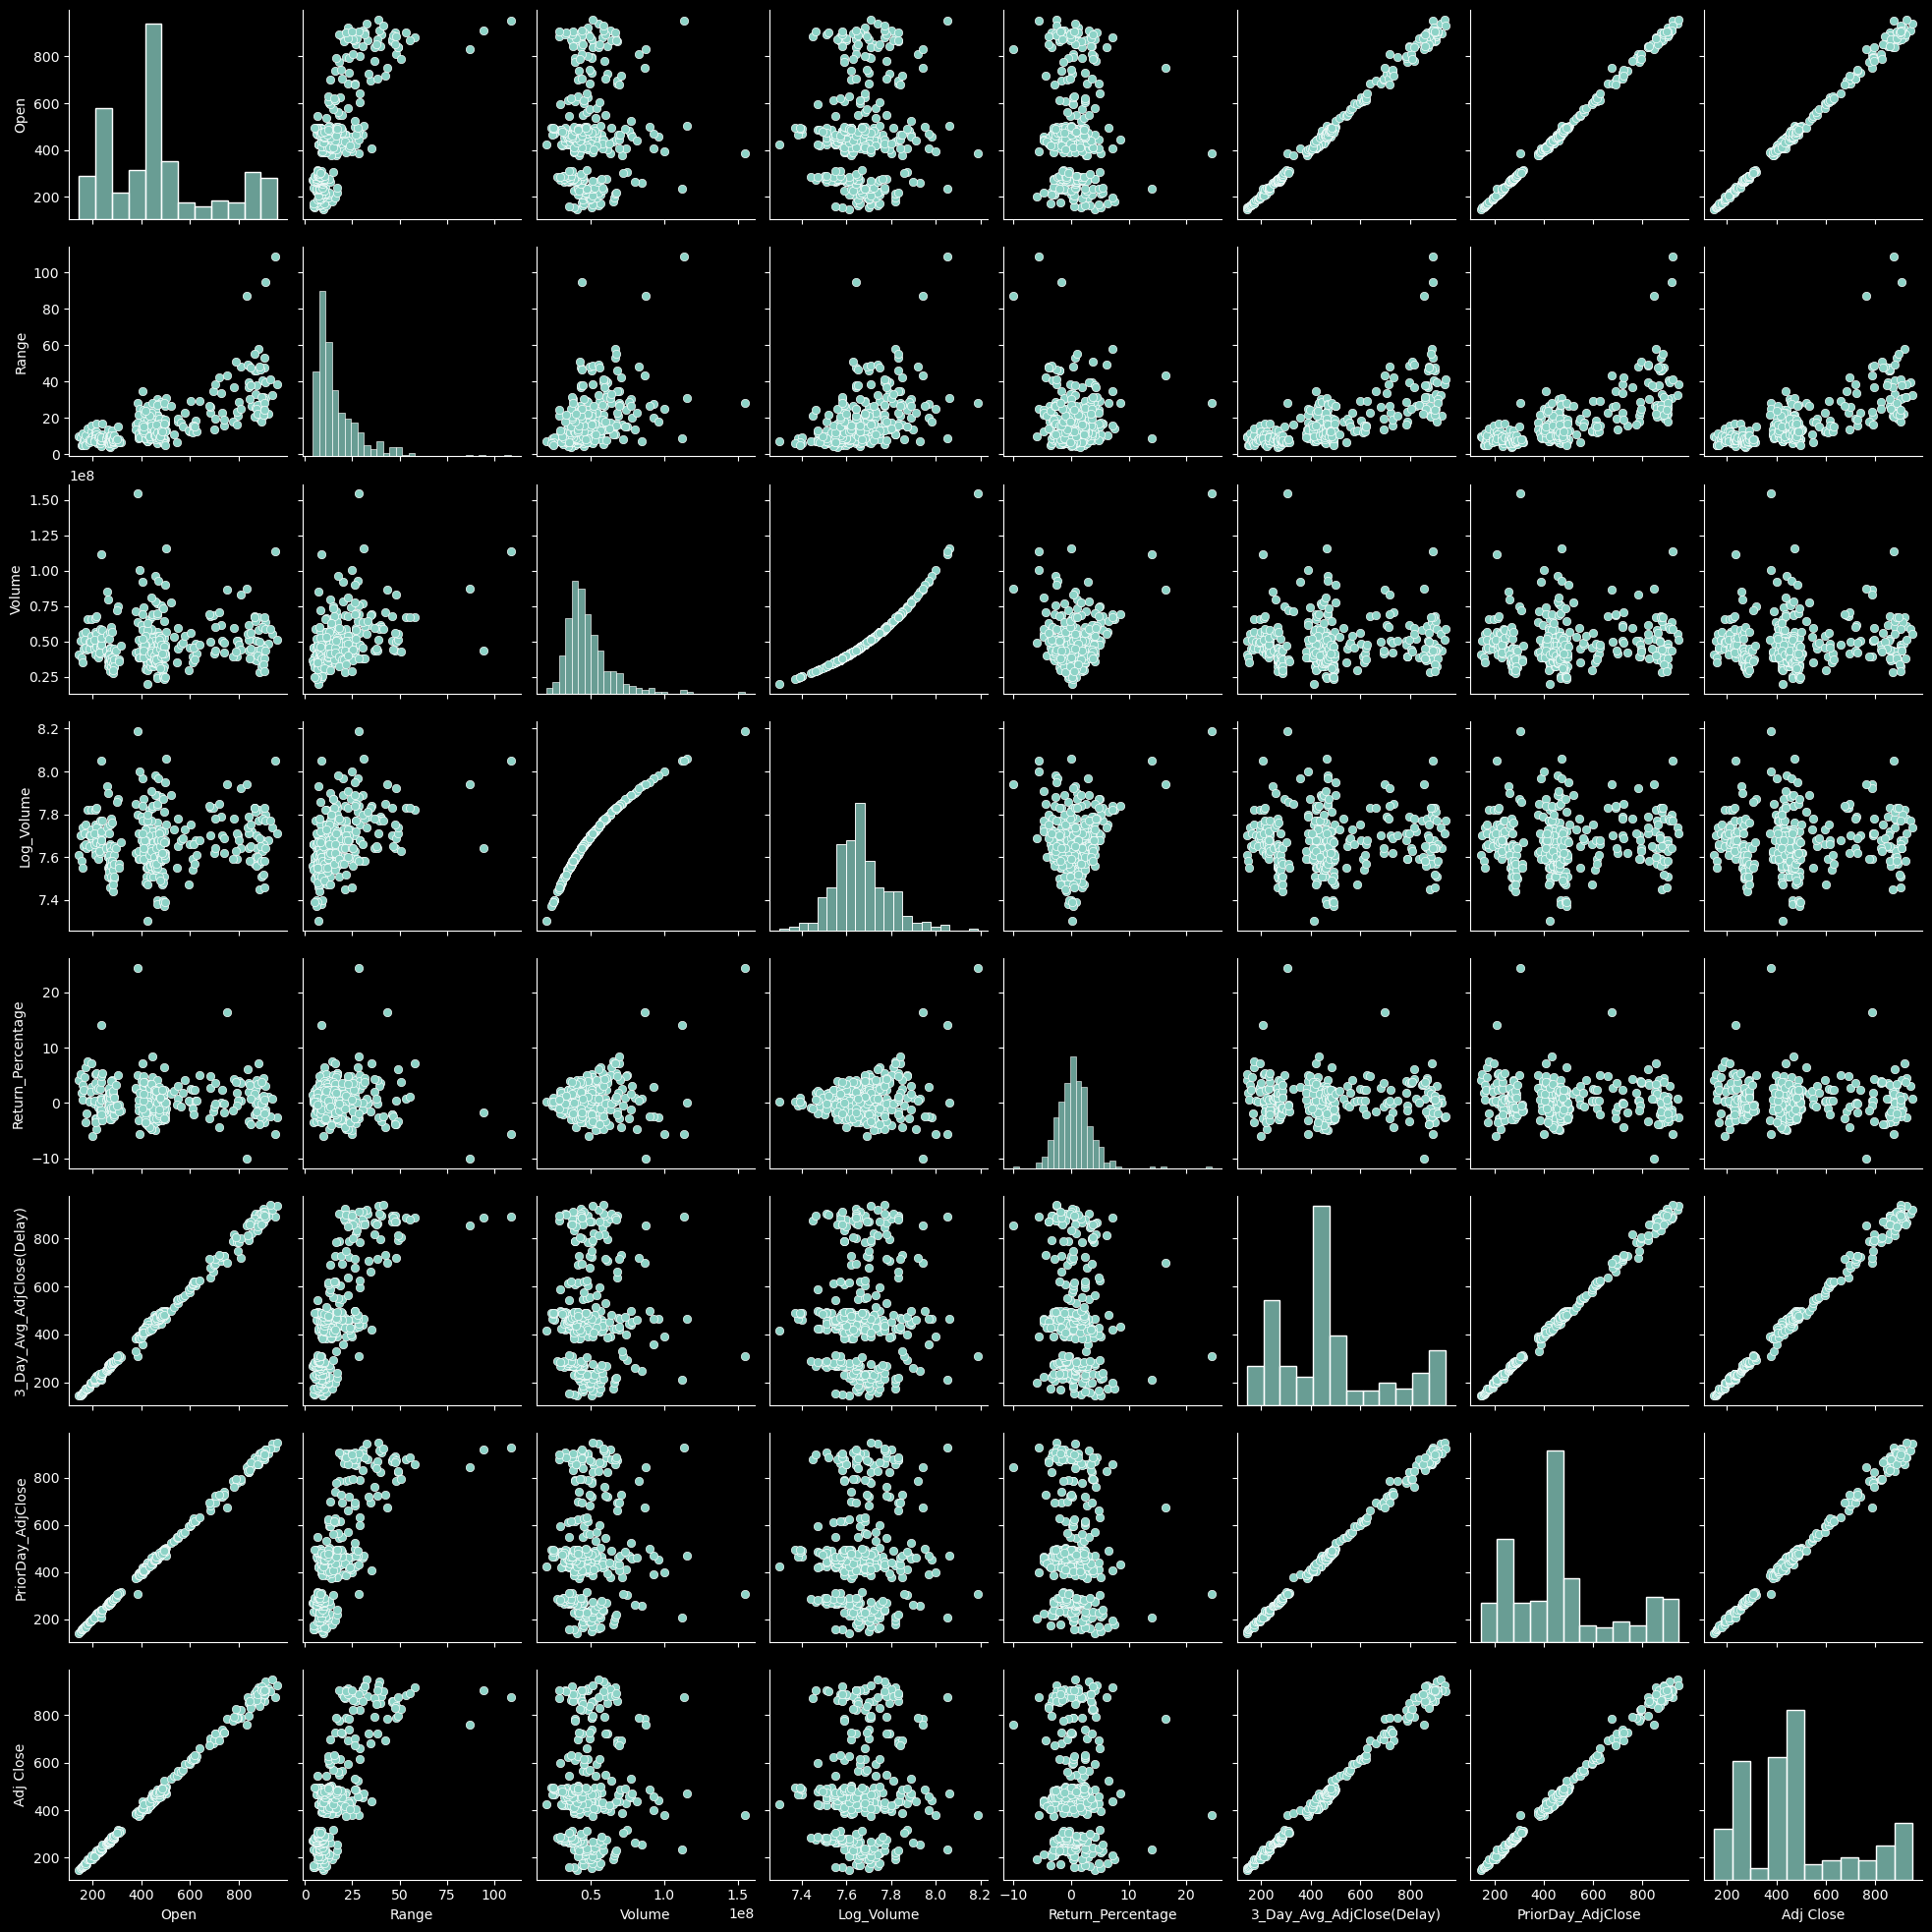

In [15]:
df_clean = pd.read_csv(DATA_PROCESSED)

sns.pairplot(df_clean[numeric_columns], height=2.5);

En base al gráfico podemos concluir rápidamente las variables que están correlacionadas y recordando que la regresión lineal trabaja con esta característica, por eso la última variable “Adj Close” es nuestra variable a predecir y las demás son las variables predictoras. Por ello, podemos ver que las variables “Open”, “3_Day_Avg_AdjClose(Delay)” y “PriorDay_AdjClose” están correlacionadas con la variable objetivo como también, algunos detalles de multicolinealidad.

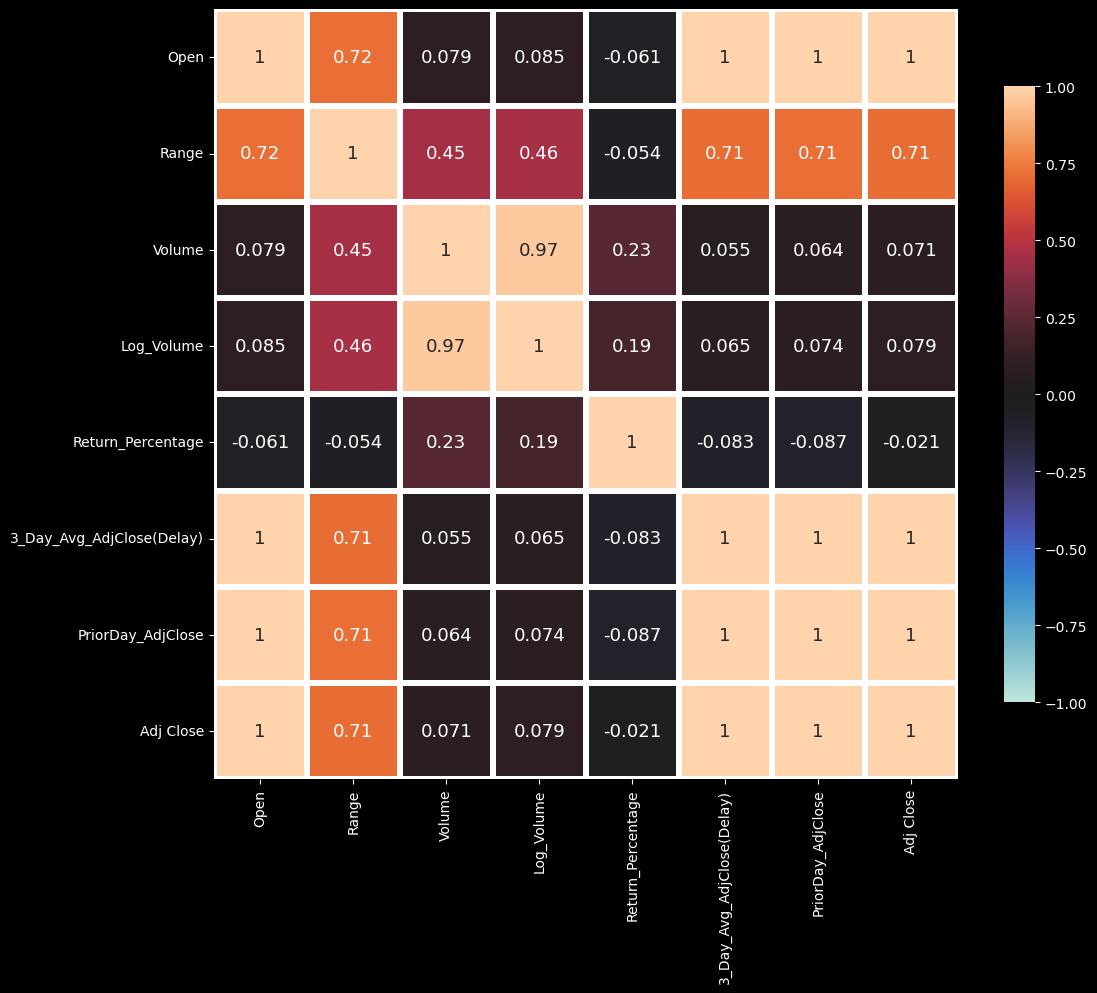

In [16]:
matrix_corr = df_clean[numeric_columns].corr()

plt.figure(figsize=(12,10))
sns.heatmap(
    matrix_corr,
    annot=True,
    vmin=-1, center=0, vmax=1,
    linewidths=3,
    annot_kws={"size": 13},
    cbar_kws={"shrink": .8},
    # fmt=".0f"
);

El gráfico de correlación nos ayuda a entender mejor que variables podemos considerar para construir un mejor modelo de regresión lineal multivariable. Además, si vemos existe multicolinealidad dado que las variables “3_Day_Avg_AdjClose(Delay)” y “PriorDay_AdjClose” están altamente correlacionadas con la variable objetivo. Por lo que podríamos escoger alguna de ellas para el entrenamiento y como recomendación la mejor opción sería “PriorDay_AdjClose“ debido a que el precio de cierre ajustado de hoy está altamente correlacionado con el de ayer.

Con respecto a las demás variables, las siguientes más importantes son “Open” y “Range”, pero las demás no son muy buenas debido a su poca correlación con la variable objetivo.

Sin embargo, para este primer modelo vamos a considerar todas las variables predictoras a excepción de “Date” y “Adj Close”.

#### 5. Estandarización de los datos

In [17]:
columns = list(set(numeric_columns) - set(['Date','Adj Close']))
vars_ind = df_clean[columns].values
var_dep = df_clean['Adj Close'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(vars_ind, var_dep)

Dado que las variables predictoras tienen outliers lo mejor es usar una estandarización robusta para manejar mejor la variabilidad causada por estos y así producir un modelo óptimo.

In [18]:
sc_x = RobustScaler().fit(vars_ind)
sc_y = RobustScaler().fit(var_dep)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

#### 6. Entrenamiento del modelo

In [19]:
# Creamos el modelo de regresión lineal
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)

LinearRegression()

#### 7. Realizando predicciones y evaluando el modelo

In [20]:
Y_pred = model_reg.predict(X_test)

# Evaluamos el modelo
print(f"R2: {r2_score(Y_test, Y_pred):.3f}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred):.3f}")

R2: 0.999
MSE: 0.001


#### 8. Análisis estadísticos del modelo

In [21]:
x_train_sm = sm.add_constant(X_train)
y_train_sm = sm.add_constant(Y_train)

reg = sm.OLS(Y_train, X_train)
resultados = reg.fit()

print(columns)
print(resultados.summary())

['Open', 'Volume', 'Return_Percentage', 'Range', '3_Day_Avg_AdjClose(Delay)', 'Log_Volume', 'PriorDay_AdjClose']
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.845e+04
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                        0.00
Time:                        16:41:58   Log-Likelihood:                          563.15
No. Observations:                 254   AIC:                                     -1112.
Df Residuals:                     247   BIC:                                     -1088.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
       

#### 9. Realizando la gráfica de residuos

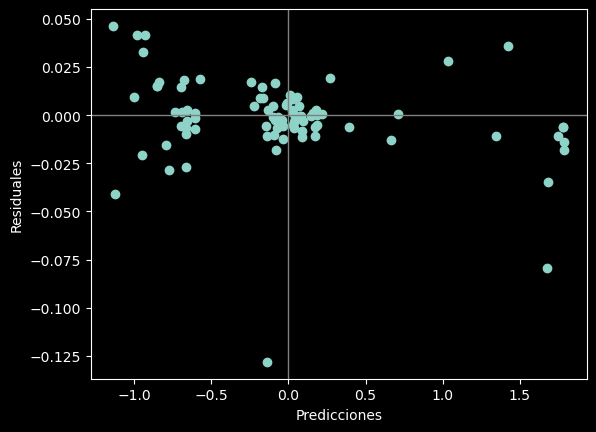

In [22]:
residuos = np.subtract(Y_test, Y_pred)
plt.scatter(
    Y_pred,
    residuos
)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.axhline(y=0, color='gray', linewidth=1)
plt.axvline(x=0, color='gray', linewidth=1);

#### 10. Creando nuevos modelos

##### 10.1 Modelo 2: Considerando las variables predictoras cuando el `valor p` < `0.05`

In [23]:
data2 = df_clean.copy()

columns = list(set(data2.columns) - set(['Date', 'Adj Close', '3_Day_Avg_AdjClose(Delay)', 'Range']))
vars_ind = data2[columns].values
var_dep = data2['Adj Close'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(vars_ind, var_dep)
sc_x = RobustScaler().fit(vars_ind)
sc_y = RobustScaler().fit(var_dep)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

# Creamos el modelo de regresión lineal
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)

Y_pred = model_reg.predict(X_test)

# Evaluamos el modelo
print(f"R2: {r2_score(Y_test, Y_pred):.3f}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred):.3f}")

R2: 0.999
MSE: 0.000


In [24]:
x_train_sm = sm.add_constant(X_train)
y_train_sm = sm.add_constant(Y_train)

reg = sm.OLS(Y_train, X_train)
resultados = reg.fit()

print(columns)
print(resultados.summary())

['Open', 'Volume', 'Return_Percentage', 'Log_Volume', 'PriorDay_AdjClose']
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.177e+04
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                        0.00
Time:                        16:41:59   Log-Likelihood:                          560.13
No. Observations:                 254   AIC:                                     -1110.
Df Residuals:                     249   BIC:                                     -1093.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t  

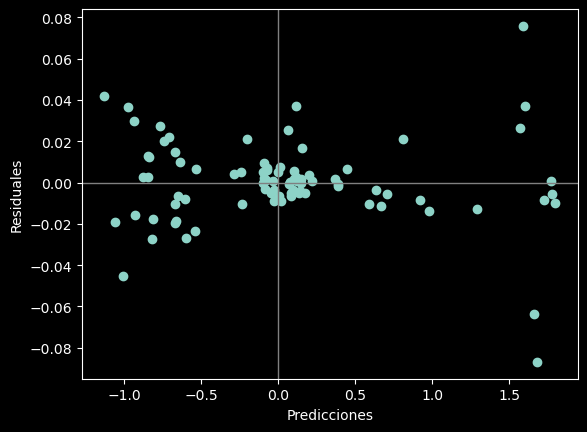

In [25]:
residuos = np.subtract(Y_test, Y_pred)
plt.scatter(
    Y_pred,
    residuos
)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.axhline(y=0, color='gray', linewidth=1)
plt.axvline(x=0, color='gray', linewidth=1);

##### 10.2 Modelo 3: Considerando las variables predictoras correlacionadas con la variable objetivo

In [26]:
data3 = df_clean.copy()

columns = ['Open', 'Range', 'PriorDay_AdjClose']
vars_ind = data3[columns].values
var_dep = data3['Adj Close'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(vars_ind, var_dep)
sc_x = RobustScaler().fit(vars_ind)
sc_y = RobustScaler().fit(var_dep)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

# Creamos el modelo de regresión lineal
model_reg = LinearRegression()
model_reg.fit(X_train, Y_train)

Y_pred = model_reg.predict(X_test)

# Evaluamos el modelo
print(f"R2: {r2_score(Y_test, Y_pred):.3f}")
print(f"MSE: {mean_squared_error(Y_test, Y_pred):.3f}")

R2: 0.996
MSE: 0.002


In [27]:
reg = sm.OLS(Y_train, X_train)
resultados = reg.fit()

print(columns)
print(resultados.summary())

['Open', 'Range', 'PriorDay_AdjClose']
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.520e+04
Date:                Wed, 28 Aug 2024   Prob (F-statistic):                   6.55e-311
Time:                        16:41:59   Log-Likelihood:                          400.33
No. Observations:                 254   AIC:                                     -794.7
Df Residuals:                     251   BIC:                                     -784.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--

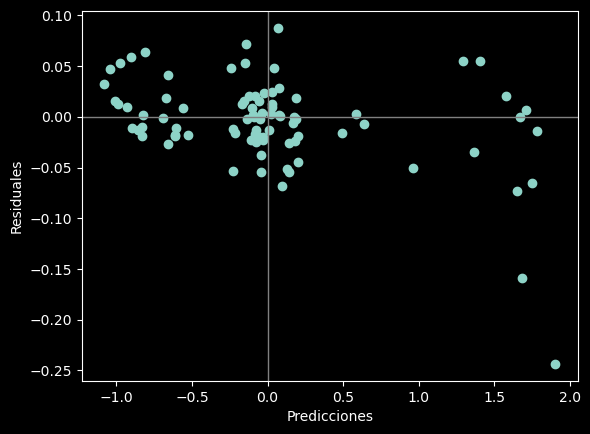

In [28]:
residuos = np.subtract(Y_test, Y_pred)
plt.scatter(
    Y_pred,
    residuos
)
plt.xlabel('Predicciones')
plt.ylabel('Residuales')
plt.axhline(y=0, color='gray', linewidth=1)
plt.axvline(x=0, color='gray', linewidth=1);